# Fundamentos de Bioinformática 

Seguindo a playlist: `https://www.youtube.com/playlist?list=PLbVDKwGpb3XnwBACQ5w8L8NzjZ-6D0M8u`

## Importando os módulos necessários

In [42]:
import skbio
from skbio.alignment import local_pairwise_align_nucleotide
from skbio.alignment import local_pairwise_align_ssw
import qiime_default_reference as qdr

from scipy.spatial.distance import hamming
import pandas as pd 
import numpy as np
import seaborn as sns

import functools
import collections
import timeit
import random 
import time

import warnings
warnings.filterwarnings('ignore')

## Introdução

In [10]:
r1 = skbio.Protein("MVLSPADKTNVKAAWGKVGAHAGEYGAEALERMFLSFPTTKTYFPHFDLSHGSAQVKGHGKKVADALTNA\
VAHVDDMPNALSALSDLHAHKLRVDPVNFKLLSHCLLVTLAAHLPAEFTPAVHASLDKFLASVSTVLTSKYR")

In [11]:
r1

Protein
---------------------------------------------------------------------
Stats:
    length: 142
    has gaps: False
    has degenerates: False
    has definites: True
    has stops: False
---------------------------------------------------------------------
0   MVLSPADKTN VKAAWGKVGA HAGEYGAEAL ERMFLSFPTT KTYFPHFDLS HGSAQVKGHG
60  KKVADALTNA VAHVDDMPNA LSALSDLHAH KLRVDPVNFK LLSHCLLVTL AAHLPAEFTP
120 AVHASLDKFL ASVSTVLTSK YR

In [12]:
r2 = skbio.Protein("MVLSAADKNNVKGIFTKIAGHAEEYGAETLERMFTTYPPTKTYFPHFDLSHGSAQIKGHGKKVVAA\
LIEAANHIDDIAGTLSKLSDLHAHKLRVDPVNFKLLGQCFLVVVAIHHPAALTPEVHASLDKFLCAVGTVLTAKYR")

In [13]:
q1 = skbio.Protein("MVLFPADKSNVKATWAKIGNHGAEYGAEALERMFMNFPSTKTYFPHFDL\
GHDSAQVKGHGKKVADALTKAAGHMDNLLDALSDLSDLHAHKLRVDPVNFKLLSHCLLVTLALHLPAEFTPSVHASLDKFLASVSTVLTSKYR")

In [14]:
hamming(list('abcde'), list('abcdd')) #20% das posições são diferentes

0.2

In [15]:
hamming(r1,r2)

0.29577464788732394

In [16]:
hamming(r1,q1)

0.16901408450704225

In [15]:
hamming(r2,q1)

0.31690140845070425

Sequence query q1 (hemoglobina de baleia) é mais similar a hemoglobina de galinha (r2) do que de humano (r1)

In [20]:
q2 = skbio.Protein("MLTDAEKKEVTALWGKAAGHGEEYGAEALERLFQAFPTTKTYFSHFDLSHGSAQIKAHGKKVADALSTAAGHFDDMD\
SALSALSDLHAHKLRVDPVNFKLLAHCILVVLARHCPGEFTPSAHAAMDKFLSKVATVLTSKYR-") #PLATYPUS HEMOGLOBIN

In [21]:
q2

Protein
---------------------------------------------------------------------
Stats:
    length: 142
    has gaps: True
    has degenerates: False
    has definites: True
    has stops: False
---------------------------------------------------------------------
0   MLTDAEKKEV TALWGKAAGH GEEYGAEALE RLFQAFPTTK TYFSHFDLSH GSAQIKAHGK
60  KVADALSTAA GHFDDMDSAL SALSDLHAHK LRVDPVNFKL LAHCILVVLA RHCPGEFTPS
120 AHAAMDKFLS KVATVLTSKY R-

In [22]:
hamming(r1,q2) # different lenghts

0.9084507042253521

In [23]:
hamming(r2,q2) # different lenghts

0.9225352112676056

Nessa abordagem, estamos assumindo que apenas substituições ocorrem no decurso evolutivo das espécies. No entanto, erros de replicação (mutações) podem ocorrer por substituições, inserções (uma ou mais bases são adicionadas a sequência) ou deleções (uma ou mais bases são deletadas da sequência).

In [24]:
q2_aligned = skbio.Protein("M-LTDAEKKEVTALWGKAAGHGEEYGAEALERLFQAFPTTKTYFSHFDLSHGSAQIKAHGKKVADALSTAAGHFDDMD\
SALSALSDLHAHKLRVDPVNFKLLAHCILVVLARHCPGEFTPSAHAAMDKFLSKVATVLTSKYR") #PLATYPUS HEMOGLOBIN

In [25]:
hamming(r1,q2_aligned) 

0.2746478873239437

In [26]:
hamming(r2,q2_aligned) 

0.34507042253521125

O percentual de diferença diminui bastante colocando um gap no lugar "certo". 

Quando temos um gap, ao comparar sequências, não conseguimos saber se ocorreu uma deleção ou uma inserção.

In [27]:
len("2PACX-1vRMKfK0UexyEYgy3DrpJTf0914M0-K4CIrmMoBBxOJuziSNwXKQ0xNQQCIb_K2muqgFTBZVyhSSNPI4")

86

## Alinhamento de sequência usando algoritmos próprios

In [28]:
seq1 = skbio.DNA("GGTCTTCGCTAGGCTTTCATCGGGTTCGGCATCTACTCTGAGTTACTAGG")
seq2 = skbio.DNA("GGTCTTCAGGCTTTCATCGGGAACGGCATCTCTGAGTTACTACC")

aln, score, start_end_positions = local_pairwise_align_nucleotide(seq1, seq2, gap_open_penalty = 8, gap_extend_penalty = 1) # usa Smith-Waterman

In [29]:
aln

TabularMSA[DNA]
------------------------------------------------
Stats:
    sequence count: 2
    position count: 48
------------------------------------------------
GGTCTTCGCTAGGCTTTCATCGGGTTCGGCATCTACTCTGAGTTACTA
GGTCTTC---AGGCTTTCATCGGGAACGGCATCT---CTGAGTTACTA

In [30]:
score

54.0

In [31]:
%timeit local_pairwise_align_nucleotide(seq1, seq2, gap_open_penalty = 8, gap_extend_penalty = 1)

70.2 ms ± 1.71 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [32]:
%timeit local_pairwise_align_ssw(seq1, seq2) #funcao otimizada, implementada em Cpp

263 µs ± 4.11 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


## Multiple Sequence Alignment (MSA)

In [33]:
msa, _, _ = local_pairwise_align_nucleotide(seq1, seq2, gap_open_penalty = 8, gap_extend_penalty = 1)
msa

TabularMSA[DNA]
------------------------------------------------
Stats:
    sequence count: 2
    position count: 48
------------------------------------------------
GGTCTTCGCTAGGCTTTCATCGGGTTCGGCATCTACTCTGAGTTACTA
GGTCTTC---AGGCTTTCATCGGGAACGGCATCT---CTGAGTTACTA

In [34]:
msa, _, _ = local_pairwise_align_ssw(seq1, seq2)
msa

TabularMSA[DNA]
------------------------------------------------
Stats:
    sequence count: 2
    position count: 48
------------------------------------------------
GGTCTTCGCTAGGCTTTCATCGGGTTCGGCATCTACTCTGAGTTACTA
GGTCTTC---AGGCTTTCATCGGGAACGGCAT---CTCTGAGTTACTA

In [35]:
def random_sequence(moltype, length):
    result = []
    # Our "alphabet" here will consist of the standard characters in a molecules alphabet
    alphabet = list(moltype.nondegenerate_chars)
    for e in range(length):
        result.append(np.random.choice(alphabet))
    return moltype(''.join(result))

In [36]:
skbio.DNA.nondegenerate_chars

{'A', 'C', 'G', 'T'}

In [37]:
skbio.Protein.nondegenerate_chars

{'A',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'Y'}

In [38]:
print(random_sequence(skbio.DNA, 10))
print(random_sequence(skbio.DNA, 10))
print(random_sequence(skbio.DNA, 50))

AGATACACTA
GTTTACTTTT
TGCGAGAGGGATACCACAGCTTGTTCCCTTGGGATTGATATATTAGAGCT


In [40]:
times = []
seq_lengths = range(5_000, 510_000, 100_000)

def get_time_function(seq_length):
    def f():
        seq1 = random_sequence(skbio.DNA, seq_length)
        seq2 = random_sequence(skbio.DNA, seq_length)
        local_pairwise_align_ssw(seq1, seq2)
    return f

for seq_length in seq_lengths:
    times.append(min(timeit.Timer(get_time_function(seq_length)).repeat(repeat=3, number=3)))
    
print("Done!")

Done!


In [43]:
runtimes = pd.DataFrame(data=np.asarray([seq_lengths, times]).T, columns = ["Sequence length", "Runtime (s)"])

### Complexidade computacional

<AxesSubplot:xlabel='Sequence length', ylabel='Runtime (s)'>

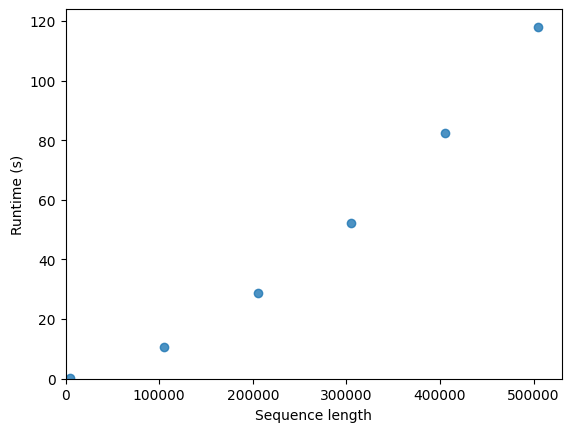

In [44]:
ax = sns.regplot(x="Sequence length", y = "Runtime (s)", data = runtimes, fit_reg = False)
ax.set_xlim(0)
ax.set_ylim(0)
ax # O(n^2) - usar mais processadores pode diminuir o runtime, mas a complexidade permanece a mesma, pois só vai dividir n^2

(0.0, 30.992003071249748)

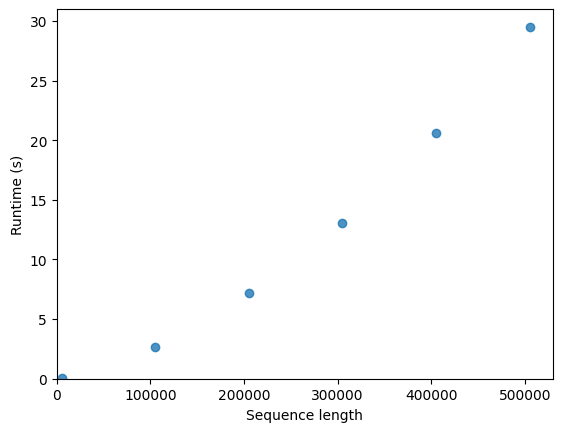

In [45]:
# if we could split this process over more processors that would effectively reduce the runtime by 1/4
parallel_runtimes = runtimes = pd.DataFrame(data=np.asarray([seq_lengths, [t/4 for t in times]]).T, columns = ["Sequence length", "Runtime (s)"])

ax = sns.regplot(x="Sequence length", y = "Runtime (s)", data = runtimes, fit_reg = False)
ax.set_xlim(0)
ax.set_ylim(0)

Ao lidar com datasets grandes, isso pode ser um problema

## Sequence Homology Searching

Sequências homólogas são sequências derivadas de um ancestral. Em vez de calcular distâncias/dissimilaridade, na busca por homólogos foca-se mais nas semelhanças entre as sequências/espécies.

Importante notar que se usa similaridade para **INFERIR** homologia, mas nem sempre isso é necessariamente verdade. Ou seja, nem toda sequência similar é homóloga a outra. Similaridade é calculada pela inverso da Hamming distance ($1-Hamming$), e seu resultado é, portanto, a fração de posições que não diferem entre as sequências.

### Full database search

In [46]:
help(local_pairwise_align_ssw)

Help on function local_pairwise_align_ssw in module skbio.alignment._pairwise:

local_pairwise_align_ssw(sequence1, sequence2, **kwargs)
    Align query and target sequences with Striped Smith-Waterman.
    
    State: Experimental as of 0.4.0.
    
    Parameters
    ----------
    sequence1 : DNA, RNA, or Protein
        The first unaligned sequence
    sequence2 : DNA, RNA, or Protein
        The second unaligned sequence
    
    Returns
    -------
    tuple
        ``TabularMSA`` object containing the aligned sequences, alignment score
        (float), and start/end positions of each input sequence (iterable
        of two-item tuples). Note that start/end positions are indexes into the
        unaligned sequences.
    
    Notes
    -----
    This is a wrapper for the SSW package [1]_.
    
    For a complete list of optional keyword-arguments that can be provided,
    see ``skbio.alignment.StripedSmithWaterman``.
    
    The following kwargs will not have any effect: `suppress

In [47]:
# A base de dados é um subset do Greengenes Database
# The Greengenes database is comprised of 16S rRNA genes organized formats for use in pipelines (with taxonomic annotations)

def load_taxonomy_reference_database(verbose=True):
    reference_taxonomy = {}
    for e in open(qdr.get_reference_taxonomy()):
        seq_id, seq_tax = e.strip().split('\t')
        reference_taxonomy[seq_id] = seq_tax

    # agora carregar as sequências usadas como referência e associar as anotações taxonomicas a elas como metadados
    reference_db = []
    for e in skbio.io.read(qdr.get_reference_sequences(), format='fasta', constructor=skbio.DNA):
        if e.has_degenerates(): # ou seja, nucleotideos desconhecidos, como N (qualquer caractere que nao A, C, G ou T)
            # vamos ignorar esses caracteres nesse exercicio pra simplificacao
            continue
        seq_tax = reference_taxonomy[e.metadata['id']]
        e.metadata['taxonomy'] = seq_tax
        reference_db.append(e)

    if verbose:
        print(f"{len(reference_db)} foram carregadas como banco de dados referencia")

    return reference_taxonomy, reference_db

In [48]:
reference_taxonomy, reference_db = load_taxonomy_reference_database()

reference_db[0]

88452 foram carregadas como banco de dados referencia


DNA
-----------------------------------------------------------------------
Metadata:
    'description': ''
    'id': '1111883'
    'taxonomy': 'k__Bacteria; p__Gemmatimonadetes; c__Gemm-1; o__; f__;
                 g__; s__'
Stats:
    length: 1428
    has gaps: False
    has degenerates: False
    has definites: True
    GC-content: 61.90%
-----------------------------------------------------------------------
0    GCTGGCGGCG TGCCTAACAC ATGTAAGTCG AACGGGACTG GGGGCAACTC CAGTTCAGTG
60   GCAGACGGGT GCGTAACACG TGAGCAACTT GTCCGACGGC GGGGGATAGC CGGCCCAACG
...
1320 GCCGCGGTGA ATACGTTCCC GGGCCTTGTA CACACCGCCC GTCACGCCAT GGAAGCCGGA
1380 GGGACCCGAA ACCGGTGGGC CAACCGCAAG GGGGCAGCCG TCTAAGGT

taxonomy segue o ReFiCOFaGE
Algumas sequências do banco de dados têm uma resolução menor ou maior, dependendo (algumas só contêm reino, outras vão até gênero ou espécie)


In [49]:
reference_db[-1]

DNA
----------------------------------------------------------------------
Metadata:
    'description': ''
    'id': '4483258'
    'taxonomy': 'k__Archaea; p__Crenarchaeota; c__Thermoprotei;
                 o__Thermoproteales; f__Thermoproteaceae; g__; s__'
Stats:
    length: 2123
    has gaps: False
    has degenerates: False
    has definites: True
    GC-content: 58.36%
----------------------------------------------------------------------
0    CTGGTTGATC CTGCCGGACC CGACCGCTAT CGGGGTGGGG CTTAGCCATG CGAGTCAAGC
60   GCCCCAGGGA CCCGCTGGGG TGCGGCGCAC GGCTCAGTAA CACGTGGCCA ACCTACCCTC
...
2040 ATAATCTCCT TATTGTCTGA TCCTTATGCA TTTTCCTTTG GCCCATCCCG TGAATACGCG
2100 CGGTGAATAC GTCCCTGCCC CTT

In [50]:
reference_db = random.sample(reference_db, k = 5000)
print(f"{len(reference_db)} sequencias estão presentes nessa amostragem da base") # pra ficar mais rapido no exercicio

5000 sequencias estão presentes nessa amostragem da base


In [51]:
def load_taxonomy_query_sequences(start_position=100, length=200):
    queries = []
    for e in skbio.io.read(qdr.get_reference_sequences(), format = 'fasta', constructor=skbio.DNA):
        if e.has_degenerates():
            continue
        e = e[start_position:start_position + length]
        queries.append(e)

    return queries
    

Nesse ponto, queremos simular como obtemos sequências com instrumentos de sequenciamento de DNA. Então, geralmente com esses instrumentos não se pega a sequência completa. É comum obtermos comprimentos de 200 a 400 bp. Por isso o argumento de `length`. Além disso, numa reação de PCR, por exemplo, o forward primer vai se ligar a sequência alvo apenas em uma determinada posição (annealing step). Por isso o argumento `start_position`.

In [52]:
queries = load_taxonomy_query_sequences()
queries = random.sample(queries, k=50)

In [53]:
queries[0]

DNA
---------------------------------------------------------------------
Metadata:
    'description': ''
    'id': '765455'
Stats:
    length: 200
    has gaps: False
    has degenerates: False
    has definites: True
    GC-content: 49.00%
---------------------------------------------------------------------
0   GAACTGGGGG ATAGCCTTTG GAAACGAGGA GTAATACCCC ATAGTATTAT TGACTGGCAT
60  CGGTTAATAA TTAAAGTTAC AGCGGTTCAA GATTGATGTG CGTTGGATTA GGTAGTTGGT
120 AAGGTAACGG CTTACCAAGC CTACGATCCA TAGGGGGCGT GAGAGCGTGA ACCCCCACAC
180 GGGTACTGAG ACACGGACCC

In [54]:
queries[-1]

DNA
---------------------------------------------------------------------
Metadata:
    'description': ''
    'id': '4432468'
Stats:
    length: 200
    has gaps: False
    has degenerates: False
    has definites: True
    GC-content: 53.00%
---------------------------------------------------------------------
0   GGGCATAACT CTGCGAAAGC AGAGATAATT CCCGATATTC TCGCAAGAGA AAAGATTTAT
60  CGCTTGAGGA GCGGCCTGCG TCTGATTAGC TTGTTGGTGG GGTAAAGGCC TACCAAGGCG
120 ATGATCAGTA GCTGGTTTGA GAGGATGACC AGCCAGACTG GGACTGAGAC ACGGCCCAGA
180 CTCCTACGGG AGGCAGCAGT

In [55]:
def local_alignment_search(queries, reference_db, n=5, aligner = local_pairwise_align_ssw):
    results = []
    indices = []
    for q in queries:
        hits = []
        for r in reference_db:
            # fazendo o alinhamento com cada sequencia da base referencia
            aln, score, _ = aligner(q,r)
            hits.append([r.metadata['id'], score, aln, r.metadata['taxonomy']])

        # fazemos entao uma ordenacao reversa pelo score, e retornamos os n alinhamentos com maior score
        best_hits = sorted(hits, key=lambda e : e[1], reverse=True)[:n]
        if len(best_hits) == 0:
            indices.append((q.metadata['id'], "no matches"))
            results.append(("n/a", np.nan, np.nan, np.nan))
        else:
            for r_id, score, aln, r_tax in best_hits:
                percent_similarity = (100 * (1. - aln[0].distance(aln[1])))
                aln_length = aln.shape[1]
                indices.append((q.metadata['id'], r_id))
                results.append((r_tax, percent_similarity, aln_length, score))

    index = pd.MultiIndex.from_tuples(indices, names = ['query', 'reference'])
    columns = ['reference taxonomy', 'percent similarity', 'alignment length', 'score']
    results = pd.DataFrame(results, index=index, columns=columns)

    return results

In [56]:
start_time = time.time()
current_queries = random.sample(queries, k=4)
results = local_alignment_search(current_queries, reference_db)
stop_time = time.time()
print(f"Runtime: {((stop_time - start_time)/len(current_queries))} segundos por query")

Runtime: 2.911095440387726 segundos por query


In [57]:
results

reference taxonomy  \
query   reference                                                      
1058761 819853     k__Bacteria; p__Proteobacteria; c__Deltaproteo...   
        225970     k__Bacteria; p__Proteobacteria; c__Deltaproteo...   
        4389685    k__Bacteria; p__Proteobacteria; c__Deltaproteo...   
        4388423    k__Bacteria; p__Proteobacteria; c__Deltaproteo...   
        568859     k__Bacteria; p__Proteobacteria; c__Deltaproteo...   
582184  348197     k__Bacteria; p__Firmicutes; c__Clostridia; o__...   
        4440360    k__Bacteria; p__Firmicutes; c__Clostridia; o__...   
        2442074    k__Bacteria; p__Firmicutes; c__Clostridia; o__...   
        450047     k__Bacteria; p__Firmicutes; c__Clostridia; o__...   
        360303     k__Bacteria; p__Firmicutes; c__Clostridia; o__...   
275984  275984     k__Bacteria; p__Firmicutes; c__Clostridia; o__...   
        196381     k__Bacteria; p__Firmicutes; c__Clostridia; o__...   
        511462     k__Bacteria; p__Firmicutes; c__Clostridia; o__...   
        290640     k__Bacteria; p__Firmicutes; c__Clostridia; o__...   
        129755     k__Bacteria; p__Firmicutes; c__Clostridia; o__...   
765455  4389210    k__Bacteria; p__Bacteroidetes; c__[Saprospirae...   
        4404665    k__Bacteria; p__Bacteroidetes; c__Flavobacteri...   
        561978     k__Bacteria; p__Bacteroidetes; c__[Saprospirae...   
        2534       k__Bacteria; p__Bacteroidetes; c__[Saprospirae...   
        586760     k__Bacteria; p__Bacteroidetes; c__[Saprospirae...   

                   percent similarity  alignment length  score  
query   reference                                               
1058761 819853              88.500000               200    283  
        225970              87.939698               199    272  
        4389685             86.069652               201    253  
        4388423             78.500000               200    170  
        568859              77.386935               199    170  
582184  348197              97.448980               196    367  
        4440360             97.435897               195    365  
        2442074             96.500000               200    365  
        450047              97.422680               194    363  
        360303              96.938776               196    362  
275984  275984             100.000000               200    400  
        196381              85.784314               204    254  
        511462              85.572139               201    254  
        290640              85.221675               203    249  
        129755              85.096154               208    246  
765455  4389210             84.693878               196    238  
        4404665             82.412060               199    217  
        561978              82.500000               200    215  
        2534                81.773399               203    211  
        586760              81.683168               202    210

In [58]:
def get_closest_taxonomies(current_queries, results):
    for q in current_queries:
        q_id = q.metadata['id']
        print (f"Taxonomias mais proximas da query {q_id} (em ordem)")
        for e in results['reference taxonomy'][q_id]:
            print(' ', e)
        print()

get_closest_taxonomies(current_queries, results)

Taxonomias mais proximas da query 1058761 (em ordem)
  k__Bacteria; p__Proteobacteria; c__Deltaproteobacteria; o__MIZ46; f__; g__; s__
  k__Bacteria; p__Proteobacteria; c__Deltaproteobacteria; o__MIZ46; f__; g__; s__
  k__Bacteria; p__Proteobacteria; c__Deltaproteobacteria; o__MIZ46; f__; g__; s__
  k__Bacteria; p__Proteobacteria; c__Deltaproteobacteria; o__Desulfuromonadales; f__Geobacteraceae; g__Geobacter; s__
  k__Bacteria; p__Proteobacteria; c__Deltaproteobacteria; o__GMD14H09; f__; g__; s__

Taxonomias mais proximas da query 582184 (em ordem)
  k__Bacteria; p__Firmicutes; c__Clostridia; o__Clostridiales; f__; g__; s__
  k__Bacteria; p__Firmicutes; c__Clostridia; o__Clostridiales; f__Lachnospiraceae; g__; s__
  k__Bacteria; p__Firmicutes; c__Clostridia; o__Clostridiales; f__; g__; s__
  k__Bacteria; p__Firmicutes; c__Clostridia; o__Clostridiales; f__Lachnospiraceae; g__; s__
  k__Bacteria; p__Firmicutes; c__Clostridia; o__Clostridiales; f__; g__; s__

Taxonomias mais proximas da q

In [59]:
def get_right_taxonomies(current_queries):
    for q in current_queries:
        q_id = q.metadata['id']
        # pra comparamos a taxonomia ja anotada com a que obtemos com o alinhamento acima
        print(f"Taxonomia conhecida para query {q_id}:\n {reference_taxonomy[q_id]}")

get_right_taxonomies(current_queries)

Taxonomia conhecida para query 1058761:
 k__Bacteria; p__Proteobacteria; c__Deltaproteobacteria; o__MIZ46; f__; g__; s__
Taxonomia conhecida para query 582184:
 k__Bacteria; p__Firmicutes; c__Clostridia; o__Clostridiales; f__Lachnospiraceae; g__Butyrivibrio; s__
Taxonomia conhecida para query 275984:
 k__Bacteria; p__Firmicutes; c__Clostridia; o__Clostridiales; f__Lachnospiraceae; g__; s__
Taxonomia conhecida para query 765455:
 k__Bacteria; p__Bacteroidetes; c__[Saprospirae]; o__[Saprospirales]; f__Saprospiraceae; g__; s__


*Complexidade computacional*: O(n).

    - Slow step: pairwise alignment

### Algoritmos heurísticos

Nesse caso, podemos sacrificar a solução ótima em tempo linear provida pelo método acima por heurísticas que vão reduzir o tempo de execução mas não garantem a solução ótima. É preciso levar em conta quão frequente o algoritmo heurístico chega na resposta certa (ou próximo) e se essa redução no tempo de execução justifica a não garantia de chegarmos na resposta correta.

In [60]:
def heuristic_local_alignment_search_random(queries, reference_db, p, n=5, aligner=local_pairwise_align_ssw):
    # p é a porcentagem que usaremos fazer uma subamostragem da nossa base de dados referencia
    k = int(p * len(reference_db))
    database_subset = random.sample(reference_db, k)
    return local_alignment_search(queries, database_subset, n=n, aligner=aligner)


In [61]:
current_queries = random.sample(queries, k=10)

In [62]:
results = heuristic_local_alignment_search_random(current_queries, reference_db, p=0.10)

get_closest_taxonomies(current_queries, results)

Taxonomias mais proximas da query 275984 (em ordem)
  k__Bacteria; p__Firmicutes; c__Clostridia; o__Clostridiales; f__Lachnospiraceae; g__; s__
  k__Bacteria; p__Firmicutes; c__Clostridia; o__Clostridiales; f__Lachnospiraceae; g__; s__
  k__Bacteria; p__Firmicutes; c__Clostridia; o__Clostridiales; f__Lachnospiraceae; g__; s__
  k__Bacteria; p__Firmicutes; c__Clostridia; o__Clostridiales; f__Lachnospiraceae; g__; s__
  k__Bacteria; p__Firmicutes; c__Clostridia; o__Clostridiales; f__Lachnospiraceae; g__; s__

Taxonomias mais proximas da query 350149 (em ordem)
  k__Bacteria; p__Bacteroidetes; c__Bacteroidia; o__Bacteroidales; f__S24-7; g__; s__
  k__Bacteria; p__Bacteroidetes; c__Bacteroidia; o__Bacteroidales; f__S24-7; g__; s__
  k__Bacteria; p__Bacteroidetes; c__Cytophagia; o__Cytophagales; f__Cytophagaceae; g__; s__
  k__Bacteria; p__Bacteroidetes; c__Bacteroidia; o__Bacteroidales; f__S24-7; g__; s__
  k__Bacteria; p__Bacteroidetes; c__Sphingobacteriia; o__Sphingobacteriales; f__Sphin

In [63]:
get_right_taxonomies(current_queries)

Taxonomia conhecida para query 275984:
 k__Bacteria; p__Firmicutes; c__Clostridia; o__Clostridiales; f__Lachnospiraceae; g__; s__
Taxonomia conhecida para query 350149:
 k__Bacteria; p__Bacteroidetes; c__Bacteroidia; o__Bacteroidales; f__S24-7; g__; s__
Taxonomia conhecida para query 338906:
 k__Bacteria; p__Bacteroidetes; c__[Saprospirae]; o__[Saprospirales]; f__Saprospiraceae; g__; s__
Taxonomia conhecida para query 809179:
 k__Bacteria; p__Verrucomicrobia; c__Verrucomicrobiae; o__Verrucomicrobiales; f__Verrucomicrobiaceae; g__Persicirhabdus; s__
Taxonomia conhecida para query 611192:
 k__Bacteria; p__Actinobacteria; c__Actinobacteria; o__Actinomycetales; f__Micromonosporaceae; g__Catellatospora; s__
Taxonomia conhecida para query 709371:
 k__Bacteria; p__Proteobacteria; c__Alphaproteobacteria; o__Rhodospirillales; f__Acetobacteraceae; g__Roseomonas; s__
Taxonomia conhecida para query 113213:
 k__Bacteria; p__Proteobacteria; c__Alphaproteobacteria; o__Rhizobiales; f__Beijerinckiaceae

In [64]:
def evaluate_search(queries, reference_db, reference_taxonomy, search_function, taxonomy_levels, n=5, aligner=local_pairwise_align_ssw):
    start_time = time.time()
    search_results = search_function(current_queries, reference_db, n=n, aligner=aligner)
    stop_time = time.time()
    runtime = stop_time - start_time
    per_query_runtime = runtime/len(queries)

    data = []
    indices = []
    for q in queries:
        q_id = q.metadata['id']
        indices.append(q_id)
        q_known_taxonomy = tuple(reference_taxonomy[q_id].split('; ')[:taxonomy_levels])
        q_observed_taxonomy = collections.Counter()
        for e in search_results['reference taxonomy'][q_id]:
            q_observed_taxonomy[tuple(e.split('; ')[:taxonomy_levels])] +=1
        q_observed_taxonomy = q_observed_taxonomy.most_common()[0][0]
        data.append((q_known_taxonomy, q_observed_taxonomy))
    index = pd.Index(indices, name = "Query ID")
    data = pd.DataFrame(data, index=index, columns= ['Known taxonomy', 'Observed taxonomy'])
    number_correct = np.sum(data['Known taxonomy'] == data['Observed taxonomy'])
    fraction_correct = number_correct/data.shape[0]

    return per_query_runtime, fraction_correct, data

In [65]:
taxonomy_levels = 5

In [66]:
runtime, fraction_correct, data = evaluate_search(current_queries, reference_db, reference_taxonomy, local_alignment_search, taxonomy_levels=taxonomy_levels)

def get_results_search_evaluation(runtime, fraction_correct, data):
    print(f"{runtime:1.2f} segundos por query sequence")
    print(f"{(fraction_correct * 100.0):1.2f}% respostas corretas")
    print("Detalhes do resultado")
    for q_id in data.index:
        print(q_id)
        print(' ', data['Known taxonomy'][q_id])
        print(' ', data['Observed taxonomy'][q_id])
        print()

get_results_search_evaluation(runtime, fraction_correct, data)


2.92 segundos por query sequence
80.00% respostas corretas
Detalhes do resultado
275984
  ('k__Bacteria', 'p__Firmicutes', 'c__Clostridia', 'o__Clostridiales', 'f__Lachnospiraceae')
  ('k__Bacteria', 'p__Firmicutes', 'c__Clostridia', 'o__Clostridiales', 'f__Lachnospiraceae')

350149
  ('k__Bacteria', 'p__Bacteroidetes', 'c__Bacteroidia', 'o__Bacteroidales', 'f__S24-7')
  ('k__Bacteria', 'p__Bacteroidetes', 'c__Bacteroidia', 'o__Bacteroidales', 'f__S24-7')

338906
  ('k__Bacteria', 'p__Bacteroidetes', 'c__[Saprospirae]', 'o__[Saprospirales]', 'f__Saprospiraceae')
  ('k__Bacteria', 'p__Bacteroidetes', 'c__[Saprospirae]', 'o__[Saprospirales]', 'f__Saprospiraceae')

809179
  ('k__Bacteria', 'p__Verrucomicrobia', 'c__Verrucomicrobiae', 'o__Verrucomicrobiales', 'f__Verrucomicrobiaceae')
  ('k__Bacteria', 'p__Verrucomicrobia', 'c__Verrucomicrobiae', 'o__Verrucomicrobiales', 'f__Verrucomicrobiaceae')

611192
  ('k__Bacteria', 'p__Actinobacteria', 'c__Actinobacteria', 'o__Actinomycetales', 'f__

In [67]:
heuristic_local_alignment_search_10 = functools.partial(heuristic_local_alignment_search_random, p=0.10)
runtime, fraction_correct, data = evaluate_search(current_queries, reference_db, reference_taxonomy, heuristic_local_alignment_search_10, taxonomy_levels=taxonomy_levels)

get_results_search_evaluation(runtime, fraction_correct, data)

0.29 segundos por query sequence
20.00% respostas corretas
Detalhes do resultado
275984
  ('k__Bacteria', 'p__Firmicutes', 'c__Clostridia', 'o__Clostridiales', 'f__Lachnospiraceae')
  ('k__Bacteria', 'p__Firmicutes', 'c__Clostridia', 'o__Clostridiales', 'f__Lachnospiraceae')

350149
  ('k__Bacteria', 'p__Bacteroidetes', 'c__Bacteroidia', 'o__Bacteroidales', 'f__S24-7')
  ('k__Bacteria', 'p__Bacteroidetes', 'c__Bacteroidia', 'o__Bacteroidales', 'f__S24-7')

338906
  ('k__Bacteria', 'p__Bacteroidetes', 'c__[Saprospirae]', 'o__[Saprospirales]', 'f__Saprospiraceae')
  ('k__Bacteria', 'p__Bacteroidetes', 'c__Flavobacteriia', 'o__Flavobacteriales', 'f__Cryomorphaceae')

809179
  ('k__Bacteria', 'p__Verrucomicrobia', 'c__Verrucomicrobiae', 'o__Verrucomicrobiales', 'f__Verrucomicrobiaceae')
  ('k__Bacteria', 'p__Verrucomicrobia', 'c__Opitutae', 'o__Puniceicoccales', 'f__Puniceicoccaceae')

611192
  ('k__Bacteria', 'p__Actinobacteria', 'c__Actinobacteria', 'o__Actinomycetales', 'f__Micromonospo

#### Composition-based reference sequence collection

- GC-Content - procurar em sequências referências similares à query sequence. Em experimentos de PCR, o conteúdo GC de primers é usado para prever a temperatura de anelamento ao molde de DNA. Um maior conteúdo GC indica, relativamente, uma maior temperatura de anelamento. Geralmente sequências com esse parâmetro semelhante são mais similares pois indica menor quantidade de substituições.

In [68]:
def heuristic_local_alignment_search_gc(queries, reference_db, database_subset_size, n=5, aligner = local_pairwise_align_ssw, reference_db_gc_contents = None):
    #abordagem deterministica
    results = []

    if reference_db_gc_contents is None:
        reference_db_gc_contents = \
            {r.metadata['id']: r.gc_content() for r in reference_db}
            
    for q in queries:
        query_gc_content = q.gc_content()
        database_subset = []
        for r in reference_db:
            ref_gc_content = reference_db_gc_contents[r.metadata['id']]
            # encontrar a diferenca entre a referencia e a query e ordenar por esse valor
            database_subset.append((abs(ref_gc_content - query_gc_content), r))
        database_subset.sort(key=lambda x: x[0])
        database_subset = [e[1] for e in database_subset[:database_subset_size]]
        results.append(local_alignment_search([q], database_subset, n=n, aligner=aligner))

    return pd.concat(results)

In [69]:
database_subset_size = 500

In [70]:
heuristic_local_alignment_search_gc_2 = functools.partial(heuristic_local_alignment_search_gc, database_subset_size=database_subset_size)

runtime, fraction_correct, data = evaluate_search(current_queries, reference_db, reference_taxonomy, heuristic_local_alignment_search_gc_2, taxonomy_levels=taxonomy_levels)

get_results_search_evaluation(runtime, fraction_correct, data)


0.32 segundos por query sequence
30.00% respostas corretas
Detalhes do resultado
275984
  ('k__Bacteria', 'p__Firmicutes', 'c__Clostridia', 'o__Clostridiales', 'f__Lachnospiraceae')
  ('k__Bacteria', 'p__Firmicutes', 'c__Clostridia', 'o__Clostridiales', 'f__Lachnospiraceae')

350149
  ('k__Bacteria', 'p__Bacteroidetes', 'c__Bacteroidia', 'o__Bacteroidales', 'f__S24-7')
  ('k__Bacteria', 'p__Bacteroidetes', 'c__Sphingobacteriia', 'o__Sphingobacteriales', 'f__Sphingobacteriaceae')

338906
  ('k__Bacteria', 'p__Bacteroidetes', 'c__[Saprospirae]', 'o__[Saprospirales]', 'f__Saprospiraceae')
  ('k__Bacteria', 'p__Bacteroidetes', 'c__[Saprospirae]', 'o__[Saprospirales]', 'f__Saprospiraceae')

809179
  ('k__Bacteria', 'p__Verrucomicrobia', 'c__Verrucomicrobiae', 'o__Verrucomicrobiales', 'f__Verrucomicrobiaceae')
  ('k__Bacteria', 'p__Armatimonadetes', 'c__Armatimonadia', 'o__Armatimonadales', 'f__Armatimonadaceae')

611192
  ('k__Bacteria', 'p__Actinobacteria', 'c__Actinobacteria', 'o__Actinom

- **k-mer content:** k-mers são nucleotídeos adjacentes de tamanho k de uma sequência.  K-mers são como uma extensão da ideia do GC-content, considerando GC como um estado e AT como outro.

In [71]:
skbio.DNA('ACCGTCACACCTGACCAA').kmer_frequencies(k=5, overlap=True)

{'ACCGT': 1,
 'CCGTC': 1,
 'CGTCA': 1,
 'GTCAC': 1,
 'TCACA': 1,
 'CACAC': 1,
 'ACACC': 1,
 'CACCT': 1,
 'ACCTG': 1,
 'CCTGA': 1,
 'CTGAC': 1,
 'TGACC': 1,
 'GACCA': 1,
 'ACCAA': 1}

In [72]:
skbio.DNA('ACCGTCACACCTGACCAA').kmer_frequencies(k=1, overlap=True)

{'A': 6, 'C': 8, 'G': 2, 'T': 2}

Blast faz algo muito semelhante à busca utilizando k-mers. Ele procura por matches entre a query sequence e a reference sequence e só alinha se elas tiverem um determinado número de k-mers compartilhado entre elas.

In [73]:
def fraction_shared_kmers(kmer_freqs1, kmer_freqs2):
    """Compute the fraction of kmers in kmer_freqs1 that are also in kmer_freqs2
    Parameters
    ----------
    kmer_freqs1, kmer_freqs2
    Returns
    -------
    float
    Raises
    -------
    ValueError
        If k < 1
    Notes
    -------
    k-mer counts are not incorporated in this distance metric"""
    sequence1_kmers = set(kmer_freqs1)
    num_sequence1_kmers = len(sequence1_kmers)
    sequence2_kmers = set(kmer_freqs2)
    shared_kmers = sequence1_kmers & sequence2_kmers
    return len(shared_kmers)/num_sequence1_kmers

In [74]:
def heuristic_local_alignment_search_kmers(queries, reference_db, database_subset_size, k, n=5, aligner = local_pairwise_align_ssw, reference_db_kmer_frequencies = None):
    #abordagem deterministica
    results = []

    if reference_db_kmer_frequencies is None:
        reference_db_kmer_frequencies = \
            {r.metadata['id']: r.kmer_frequencies(k=k, overlap=True) for r in reference_db}
            
    for q in queries:
        query_kmer_frequency = q.kmer_frequencies(k=k, overlap=True)
        database_subset = []
        for r in reference_db:
            ref_kmer_frequency = reference_db_kmer_frequencies[r.metadata['id']]
            s = fraction_shared_kmers(query_kmer_frequency, ref_kmer_frequency)
            database_subset.append((s, r))
        database_subset.sort(key=lambda x: x[0], reverse=True)
        database_subset = [e[1] for e in database_subset[:database_subset_size]]
        results.append(local_alignment_search([q], database_subset, n=n, aligner=aligner))

    return pd.concat(results)

In [75]:
k=7

In [76]:
heuristic_local_alignment_search_kmers_50 = functools.partial(heuristic_local_alignment_search_kmers, k=k, database_subset_size=database_subset_size)

runtime, fraction_correct, data = evaluate_search(current_queries, reference_db, reference_taxonomy, heuristic_local_alignment_search_kmers_50, taxonomy_levels=taxonomy_levels)

get_results_search_evaluation(runtime, fraction_correct, data)


3.65 segundos por query sequence
80.00% respostas corretas
Detalhes do resultado
275984
  ('k__Bacteria', 'p__Firmicutes', 'c__Clostridia', 'o__Clostridiales', 'f__Lachnospiraceae')
  ('k__Bacteria', 'p__Firmicutes', 'c__Clostridia', 'o__Clostridiales', 'f__Lachnospiraceae')

350149
  ('k__Bacteria', 'p__Bacteroidetes', 'c__Bacteroidia', 'o__Bacteroidales', 'f__S24-7')
  ('k__Bacteria', 'p__Bacteroidetes', 'c__Bacteroidia', 'o__Bacteroidales', 'f__S24-7')

338906
  ('k__Bacteria', 'p__Bacteroidetes', 'c__[Saprospirae]', 'o__[Saprospirales]', 'f__Saprospiraceae')
  ('k__Bacteria', 'p__Bacteroidetes', 'c__[Saprospirae]', 'o__[Saprospirales]', 'f__Saprospiraceae')

809179
  ('k__Bacteria', 'p__Verrucomicrobia', 'c__Verrucomicrobiae', 'o__Verrucomicrobiales', 'f__Verrucomicrobiaceae')
  ('k__Bacteria', 'p__Verrucomicrobia', 'c__Verrucomicrobiae', 'o__Verrucomicrobiales', 'f__Verrucomicrobiaceae')

611192
  ('k__Bacteria', 'p__Actinobacteria', 'c__Actinobacteria', 'o__Actinomycetales', 'f__

Conseguimos resultados semelhantes ao do full database method mas o runtime aumenta muito. Então como melhoramos isso?

#### Further optimizing composition-based approaches by pre-computing reference 
Podemos aplicar isso ao método do GC-content tanbém. Assim inserimos esse overhead apenas uma vez e as próximas buscas serão muito mais rápidas.

In [77]:
reference_db_kmer_frequencies =  {r.metadata['id']: r.kmer_frequencies(k=k, overlap=True) for r in reference_db}

In [78]:
heuristic_local_alignment_search_kmers_50 = functools.partial(heuristic_local_alignment_search_kmers, reference_db_kmer_frequencies=reference_db_kmer_frequencies, k=k, database_subset_size=database_subset_size)

runtime, fraction_correct, data = evaluate_search(current_queries, reference_db, reference_taxonomy, heuristic_local_alignment_search_kmers_50, taxonomy_levels=taxonomy_levels)

get_results_search_evaluation(runtime, fraction_correct, data)


0.54 segundos por query sequence
80.00% respostas corretas
Detalhes do resultado
275984
  ('k__Bacteria', 'p__Firmicutes', 'c__Clostridia', 'o__Clostridiales', 'f__Lachnospiraceae')
  ('k__Bacteria', 'p__Firmicutes', 'c__Clostridia', 'o__Clostridiales', 'f__Lachnospiraceae')

350149
  ('k__Bacteria', 'p__Bacteroidetes', 'c__Bacteroidia', 'o__Bacteroidales', 'f__S24-7')
  ('k__Bacteria', 'p__Bacteroidetes', 'c__Bacteroidia', 'o__Bacteroidales', 'f__S24-7')

338906
  ('k__Bacteria', 'p__Bacteroidetes', 'c__[Saprospirae]', 'o__[Saprospirales]', 'f__Saprospiraceae')
  ('k__Bacteria', 'p__Bacteroidetes', 'c__[Saprospirae]', 'o__[Saprospirales]', 'f__Saprospiraceae')

809179
  ('k__Bacteria', 'p__Verrucomicrobia', 'c__Verrucomicrobiae', 'o__Verrucomicrobiales', 'f__Verrucomicrobiaceae')
  ('k__Bacteria', 'p__Verrucomicrobia', 'c__Verrucomicrobiae', 'o__Verrucomicrobiales', 'f__Verrucomicrobiaceae')

611192
  ('k__Bacteria', 'p__Actinobacteria', 'c__Actinobacteria', 'o__Actinomycetales', 'f__

## Como determinar se um alinhamento é estatisticamente significante?


Interpretando scores de alinhamento: que fração de tempo eu obteria um score pelo menos tão bom quanto essse se minhas sequências não fossem homólogas? (definição de p-value sendo H0 - sequências não são homólogas e Ha - sequências são homólogas. Se p < alpha (geralmente 0.05), aceitamos a hipótese alternativa). Se p >= alpha, falhamos em rejeitar a hipótese nula, ou seja, não coletamos evidências suficientes para apoiar a alternativa.

Erro tipo I: falso positivo (dizemos que sequências são homólogas quando não são)
Erro tipo II: falso negativo (dizemos que sequências não são homólogas quando são)

Quanto menor o alpha, teremos mais falsos negativos. Quando esse valor for alto, teremos mais falsos positivos. Para escolhermos, portanto, temos que pensar no que é mais aceitável (falso negativo ou falso positivo) no cenário que estamos trabalhando.

In [79]:
def random_sequence(moltype, length):
    result = []
    alphabet = list(moltype.nondegenerate_chars)
    for e in range(length):
        result.append(random.choice(alphabet))
    return moltype(''.join(result))

In [80]:
seq = random_sequence(skbio.DNA, 50)
seq

DNA
--------------------------------------------------------
Stats:
    length: 50
    has gaps: False
    has degenerates: False
    has definites: True
    GC-content: 40.00%
--------------------------------------------------------
0 CTTATGCCCA CCCAGAATGG ATGTCAAACT CATTGTGATT GAAAACTGAA

In [81]:
def shuffle_sequence(sequence):
    # lista com os indices
    randomized_order = list(range(len(sequence)))

    # rearranjamos randomicamente essa ordem
    random.shuffle(randomized_order)

    # retornamos uma nova sequencia com as ordens embaralhadas
    return sequence[randomized_order]

In [82]:
shuffle_sequence(seq) # a composicao é a msm, apenas muda a ordem

DNA
--------------------------------------------------------
Stats:
    length: 50
    has gaps: False
    has degenerates: False
    has definites: True
    GC-content: 40.00%
--------------------------------------------------------
0 GTCCTAATCG TATGATAATG CGGCGTAAAC GTTACTAATC GAACAAATCC

In [83]:
query_seq = random_sequence(skbio.DNA, 50)
_, actual_score, _ = local_pairwise_align_ssw(query_seq, query_seq)
print(f"Score: {actual_score:1.2f}")

Score: 100.00


In [84]:
query_seq1 = random_sequence(skbio.DNA, 50)
query_seq2 = random_sequence(skbio.DNA, 50)
_, actual_score2, _ = local_pairwise_align_ssw(query_seq1, query_seq2)
print(f"Score: {actual_score:1.2f}")

Score: 100.00


- Z-test: descobrir se o score encontrado é um outlier da distribuição. Descobrimos quantos desvios padrão acima ou abaixo da média da população a pontuação derivada de um z-teste é.

Mas como fazer se não temos a distribuição de scores? Também não sabemos se é uma distribuição normal ou não.

    - Determinamos como os scores seriam se a hipótese nula fosse verdade. Ou seja, como seria a distribuição de scores de alinhamento se as sequências não fossem homólogas.

In [85]:
def generate_random_score_distribution(sequence1, sequence2, n=99, aligner=local_pairwise_align_ssw):
    # supondo que queremos comparar sequence1 com sequence2, faremos uma geração aleatoria de sequencias similares a sequence1 sabendo que nao sao homologas pois embaralhamos elas
    scores = []
    for i in range(n):
        random_sequence = shuffle_sequence(sequence1)
        _, score, _ = aligner(random_sequence, sequence2)
        scores.append(score)

    return scores

In [86]:
random_scores = generate_random_score_distribution(query_seq, query_seq, 99)
random_scores

[12,
 13,
 10,
 10,
 14,
 10,
 12,
 16,
 9,
 13,
 12,
 17,
 8,
 10,
 11,
 11,
 12,
 10,
 13,
 10,
 14,
 14,
 10,
 10,
 11,
 10,
 13,
 12,
 10,
 14,
 10,
 16,
 16,
 12,
 10,
 12,
 14,
 14,
 10,
 12,
 14,
 12,
 14,
 10,
 11,
 10,
 12,
 8,
 12,
 8,
 10,
 12,
 11,
 13,
 12,
 9,
 11,
 10,
 10,
 11,
 17,
 10,
 12,
 10,
 13,
 10,
 10,
 10,
 10,
 11,
 14,
 9,
 8,
 11,
 12,
 9,
 12,
 15,
 8,
 12,
 9,
 12,
 14,
 10,
 12,
 10,
 10,
 14,
 12,
 10,
 10,
 15,
 12,
 15,
 16,
 10,
 11,
 15,
 13]

In [88]:
def plot_score_distribution(actual_score, random_scores):
    ax = sns.distplot(random_scores, kde=False, label="Random scores", color="b")
    ax.plot([actual_score, actual_score], ax.get_ylim(), '--', label="Actual score")
    ax.set_xlim(0, actual_score + actual_score*0.1)
    ax.legend(loc=9, fontsize='large')
    return ax


<AxesSubplot:>

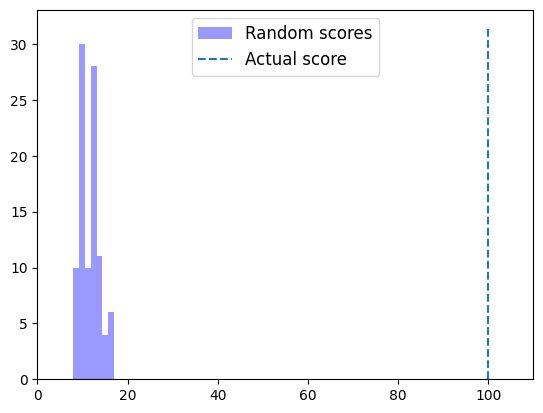

In [89]:
plot_score_distribution(actual_score, random_scores)

# vemos que o score real é um outlier da distribuicao randomizada de scores  

In [90]:
def fraction_better_or_equivalent_alignments(sequence1, sequence2, n=99, aligner=local_pairwise_align_ssw):
    # alinhar seq1 e seq2 e armazenar o score desse alinhamento
    _, actual_score, _ = aligner(sequence1, sequence2)
    
    # computar a distribuicao de scores randomizada
    random_scores = generate_random_score_distribution(sequence1, sequence2, n, aligner=aligner)

    # contar numero de scores randomicos que são tão bons quanto nosso score real
    count_better = 0
    for s in random_scores:
        if s >= actual_score:
            count_better += 1

    # retornar numero de vezes que observamos que o score é tão bom quanto o random score dividido pelo numero de scores computados. 
    # (+ 1 no denominador e numerador para representar nosso actual_score)
    return (count_better + 1)/(n + 1)

In [92]:
f"Fraction of alignment scores at least as good as the alignment score: {fraction_better_or_equivalent_alignments(query_seq, query_seq, 99)}"

'Fraction of alignment scores at least as good as the alignment score: 0.01'

p-value = 0.01, pois nunca observamos random scores maiores que o score real e sabemos que as sequências são homólogas

In [93]:
f"Fraction of alignment scores at least as good as the alignment score: {fraction_better_or_equivalent_alignments(query_seq, query_seq, 999)}"
# p-value = 0.001

'Fraction of alignment scores at least as good as the alignment score: 0.001'

In [94]:
sequence1 = random_sequence(skbio.DNA, 250)
sequence2 = random_sequence(skbio.DNA, 250)

f"Fraction of alignment scores at least as good as the alignment score: {fraction_better_or_equivalent_alignments(sequence1, sequence2)}"

'Fraction of alignment scores at least as good as the alignment score: 0.93'

Agora, temos um alinhamento não significativo, logo não temos evidências para dizer que são homólogas (de fato sabemos que não são pois foram randomizadas)

In [96]:
def partially_randomize_sequence(percent_id, sequence):
    # testar pra sequencias parcialmente randomizadas (nao sabemos se serao homologas ou nao)
    result = []

    for c in sequence:
        if random.random() < percent_id:
            result.append(str(c))
        else:
            result.append(random.choice([r for r in sequence.nondegenerate_chars if r != c]))

    return sequence.__class__(''.join(result))

In [97]:
sequence1_95 = partially_randomize_sequence(.95, sequence1) # mutacoes ou substituicoes em aproximadamente 5% das posicoes de sequence1 
sequence1_95

DNA
---------------------------------------------------------------------
Stats:
    length: 250
    has gaps: False
    has degenerates: False
    has definites: True
    GC-content: 49.60%
---------------------------------------------------------------------
0   GGAGCAGGAT ATGAGGTGGT GTGTCGAATC TGGGGACTAT ACCAAGTCGT CTCCTGTGAA
60  TCTTCGAATA CAATTGCAGG CGGAGTAAGA TCCAACTTGG TAAAACCTTC GAACCATATG
120 TAATCAAATA AAAGGTAGGG CCGTCATTGT TCCGTAGTGA AACAGCAACC ACGGTGGGTG
180 CCCTCCAGAA GTACTTGCGA GTACCGAGGG GCCGAGCGGT TTTACGGGTA CCGCCTCCTA
240 TCTTCAGTAT

In [98]:
f"Fraction of alignment scores at least as good as the alignment score: {fraction_better_or_equivalent_alignments(sequence1, sequence1_95)}"

'Fraction of alignment scores at least as good as the alignment score: 0.01'

 Definindo mutações ou substituições em aproximadamente 5% das posições de sequence1: 

In [100]:
sequence1_25 = partially_randomize_sequence(.25, sequence1)

f"Fraction of alignment scores at least as good as the alignment score: {fraction_better_or_equivalent_alignments(sequence1, sequence1_25)}"

'Fraction of alignment scores at least as good as the alignment score: 0.08'

Já não conseguimos determinar homologia (p-value > 0.1)

### Explorando o limite de detecção de busca por sequências homólogas

Quão diferentes as sequências devem ser antes desse método parar de identificá-las como homólogas?

**Conceito de percent identity**: número que descreve quão similar a query sequence é da target (quantos caracteres de cada sequência são idênticos).

In [102]:
# definindo range de percent identities que testaremos
percent_ids = np.arange(0.0, 1.0, 0.05)

# definindo numero de random sequences que testaremos para cada percent identity
num_trials = 20

# definindo tamanho de sequencias que vamos trabalhar
sequence_length = 150

# definindo num_trials random sequences
random_sequences = [random_sequence(skbio.DNA, sequence_length) for i in range(num_trials)]

results = []

for percent_id in percent_ids:
    # para cada percentage identity, verificamos os p-values para cada trial/tentativa (random sequence)
    p_values = []
    for sequence in random_sequences:
        # vamos randomizar parcialmente a sequencia e computar e guardar seu p-value
        sequence_at_percent_id = partially_randomize_sequence(percent_id, sequence)
        
        p = fraction_better_or_equivalent_alignments(sequence, sequence_at_percent_id)
        p_values.append(p)
    results.append((percent_id, np.median(p_values), np.mean(p_values)))

pd.DataFrame(results, columns = ["Percent id between query and subject", "Median p-value", "Mean p-value"])

,Percent id between query and subject,Median p-value,Mean p-value
0,0.00,0.550,0.5565
1,0.05,0.420,0.4935
2,0.10,0.405,0.4965
3,0.15,0.505,0.5520
4,0.20,0.585,0.5415
5,0.25,0.225,0.3975
6,0.30,0.400,0.4445
7,0.35,0.145,0.3490
8,0.40,0.010,0.0810
9,0.45,0.010,0.0885


Se tivermos sequências homólogas mas com muitas mutações entre elas, chegaremos no limite de detecção para busca dessas sequências. Nesse caso acima, esse limite ocorre por volta de 40% de mutações, olhando para mediana. Para casos com muitas mutações nos nucleotídeos, pode ser mais eficiente olhar o alinhamento de proteínas no lugar de nucleotídeos, pois podemos ter mutações em nucleotídeos que sao sinônimos, ou seja, o aminoácido não é modificado. Assim, teríamos menos substituições na sequência de proteínas do que na sequência de nucleotídeos, pelo fato de o código genético ser degenerado/redundante. Além disso, as substituições podem não modifiicar a estrutura da proteína por provocarem substituções por aminoácidos semelhantes. Então, olhando a estrutura das proteínas tambem conseguiríamos determinar se há evidência para homologia.